**About the dataset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [242]:
#importing the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plta


In [49]:
from sklearn import datasets

toy_datasets = [d for d in dir(datasets) if d.startswith('load_')]
print(toy_datasets)

['load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine']


In [50]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [51]:
iris = pd.read_csv('iris.csv')


In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [54]:
iris.shape

(150, 5)

#### Data Preprocessing 

In [55]:
iris[iris.isnull()].any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [56]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [58]:
iris.drop_duplicates(inplace=True,)

In [61]:
iris[iris.duplicated()].any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

#### EDA 

In [63]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [64]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [67]:
iris['species'] = iris['species'].astype('object')

In [68]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


- There are no missing entries in the data lets proceed to visualization

#### Univariet Analysis 

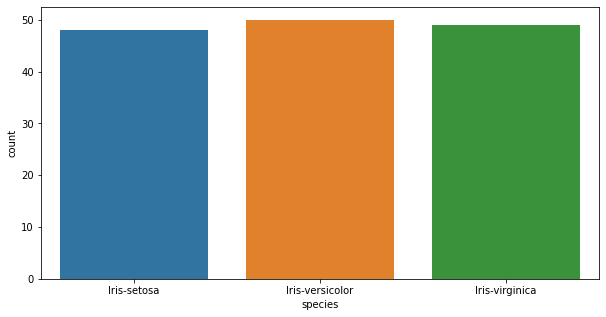

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(iris['species'])
plt.show()

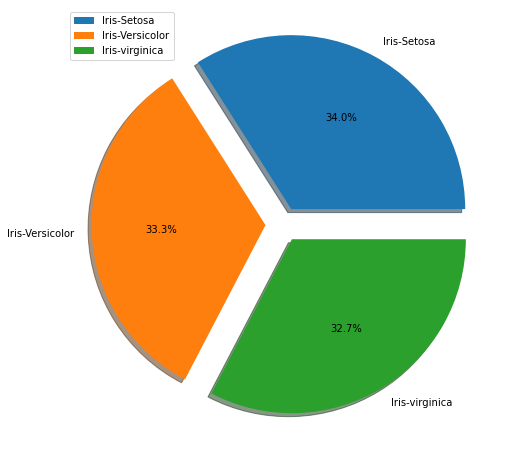

In [115]:
plt.figure(figsize=(10,8))
x = iris.species.value_counts()
explode = [0.1,0.1,0.1]
labels = ['Iris-Setosa','Iris-Versicolor','Iris-virginica']
plt.pie(x=x,labels=labels,shadow=True,explode = explode,autopct='%.1f%%')
plt.legend()
plt.show()

- Iris-Versicolor is the largest species followed by Iris-Virginica and finally iris-Setosa

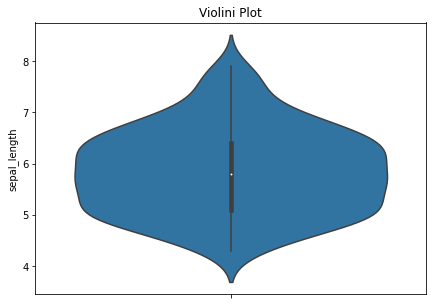

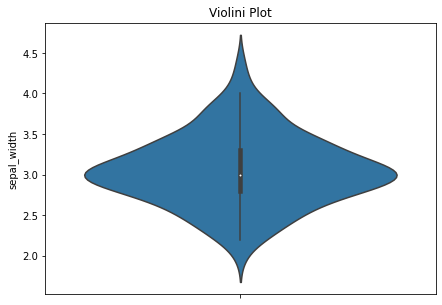

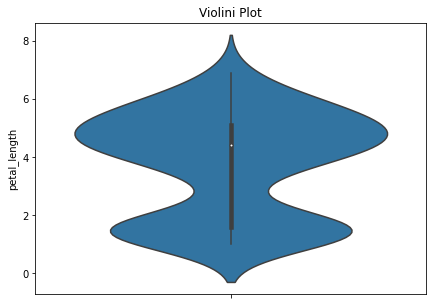

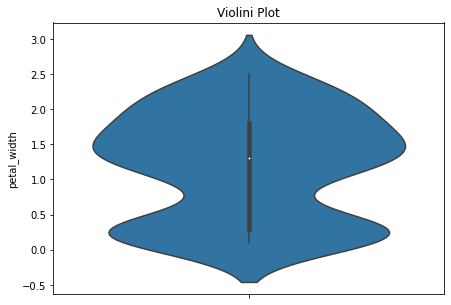

In [218]:
for col in iris.columns[:4]:
    plt.figure(figsize=(7,5))
    sns.violinplot(y=iris[col])
    plt.title('Violini Plot')
    plt.show()

#### Bivariet Analysis 

<Figure size 576x360 with 0 Axes>

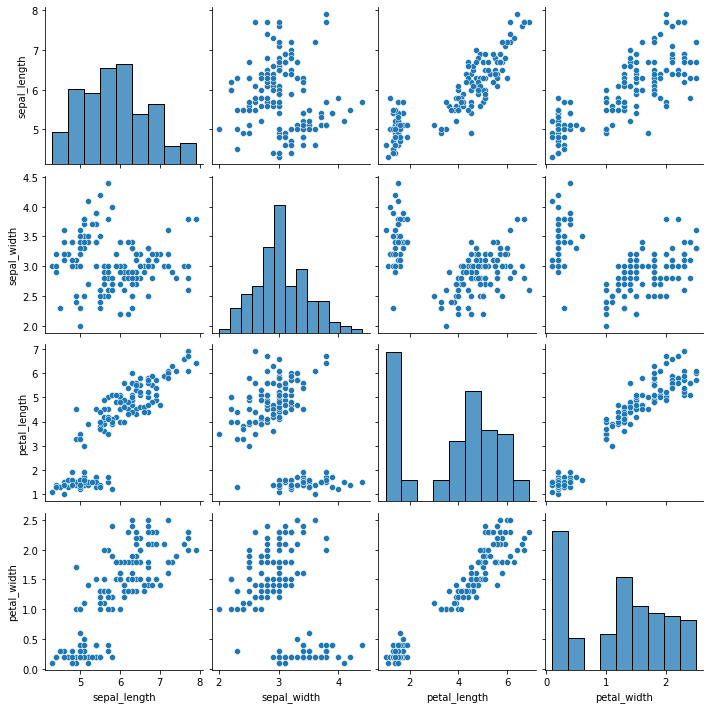

In [84]:
plt.figure(figsize=(8,5))
sns.pairplot(iris.iloc[:,:4])
plt.show()

Skew : 0.29255956516307163


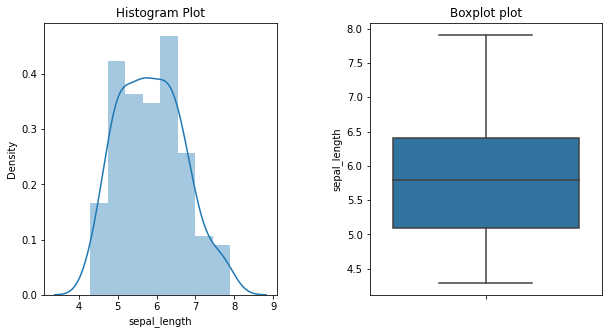

Skew : 0.3243506195620299


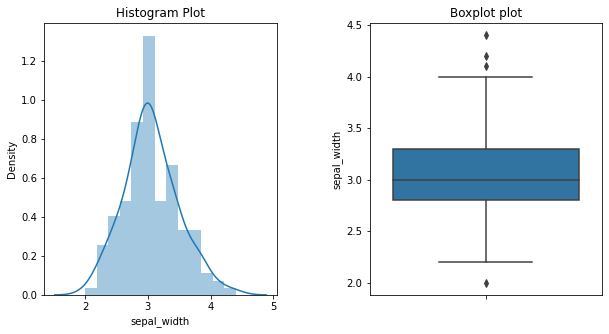

Skew : -0.2937634574565383


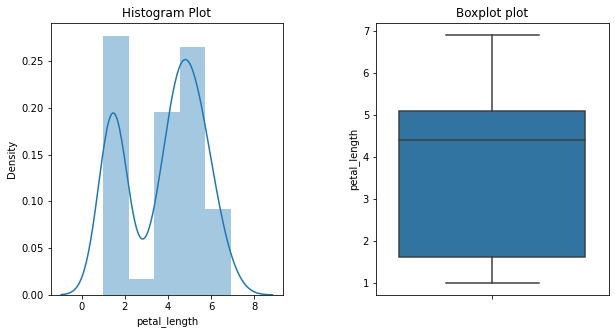

Skew : -0.11347861374619836


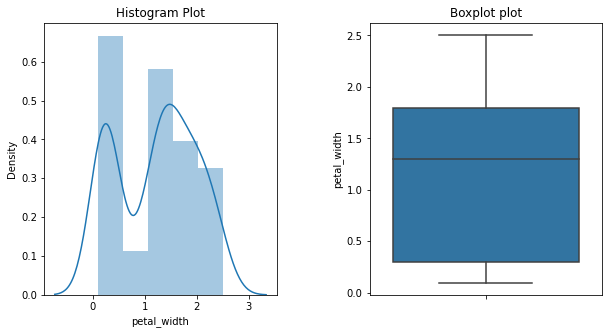

In [221]:
for col in iris.columns[:4] :
    print('Skew :', iris[col].skew())
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1) 
    sns.distplot(iris[col])
    plt.title('Histogram Plot')
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    plt.subplot(1,2,2)
    sns.boxplot(y=iris[col])
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    plt.title('Boxplot plot')
    plt.show()

In [202]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

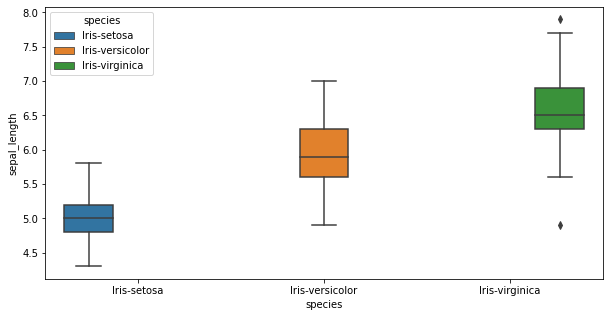

In [213]:
plt.figure(figsize=(10,5))
sns.boxplot(x='species',y='sepal_length',hue='species',data=iris)
plt.show()

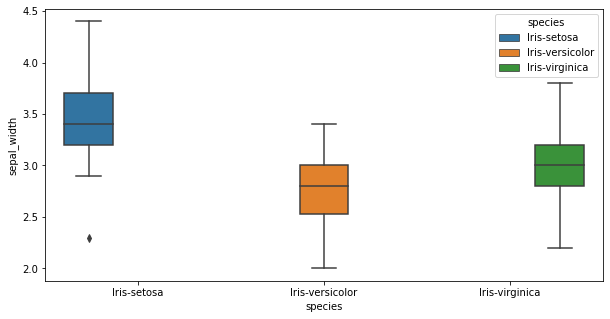

In [214]:
plt.figure(figsize=(10,5))
sns.boxplot(x='species',y='sepal_width',hue='species',data=iris)
plt.show()

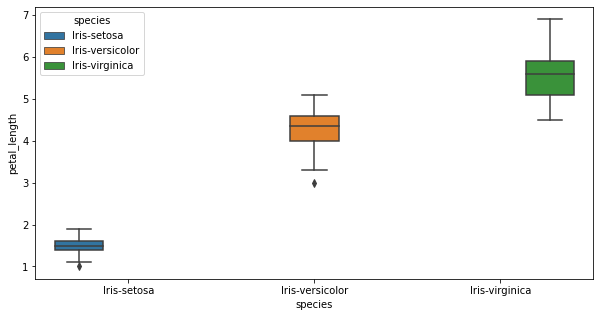

In [215]:
plt.figure(figsize=(10,5))
sns.boxplot(x='species',y='petal_length',hue='species',data=iris)
plt.show()

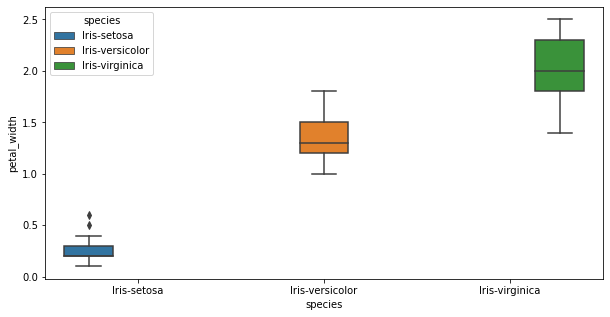

In [216]:
plt.figure(figsize=(10,5))
sns.boxplot(x='species',y='petal_width',hue='species',data=iris)
plt.show()

**Observations**
- Iris-virginica has the highest sepal_length,petal_length and petal_width
- Iris-setosa has the highest sepal_width with little bit of outliers
- Iris-versicolor has the lowest sepal_width than the other 2 classes

#### correlation 

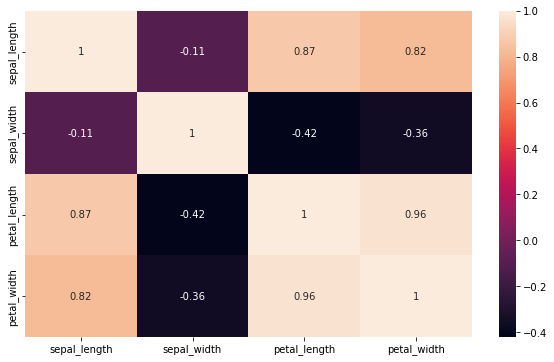

In [116]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(),annot=True)
plt.show()

**Observations**
- There is a strong positive correlation between petal-length and sepal-length so as to petal-width and sepal-length
- There is also a strong positive correlation between petal-width and petal-length
- Negative correlation appears between petal_length and sepal_width combined with petal_width and sepal_width
- There also exist a negative correlation between sepal_width and sepal_length

#### Building the model 

In [118]:
#before scalling let us remove the features that are of no importance ie species
new_iris = iris.drop('species',axis=1)

In [119]:
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [120]:
#first we need to scale the dataset remember to convert it into a dataframe.

scaler = StandardScaler()
new_iris_scaled = pd.DataFrame(scaler.fit_transform(new_iris),columns=new_iris.columns)
new_iris_scaled.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


## PCA

In [136]:
n = new_iris_scaled.shape[1]

pca = PCA(n_components=n, random_state=1)
iris_pca = pd.DataFrame(pca.fit_transform(new_iris_scaled),columns=new_iris_scaled.columns)

exp_var_ratio = pca.explained_variance_ratio_

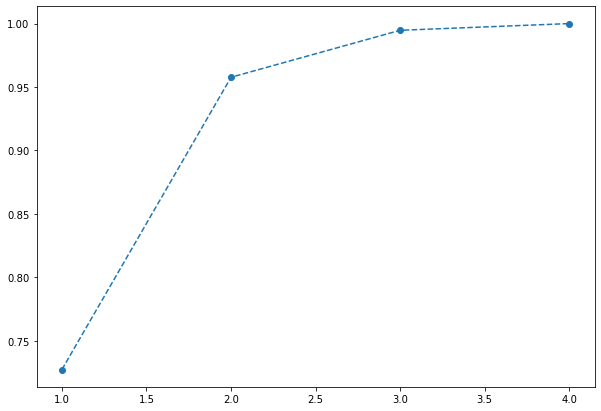

In [134]:
plt.figure(figsize=(10,7))
plt.plot(range(1,5),exp_var_ration.cumsum(),marker='o',linestyle='--')
plt.show()

In [224]:
#enumerate
sum=0
for ix, i in enumerate(exp_var_ration):
 sum=sum+i
 if(sum>0.95):
        print('The number of principal components that explaine more than 95% of variance is :', ix+1)
        break
        

The number of principal components that explaine more than 95% of variance is : 2


- Only two PC's explain more than 95% of variance in the dataset iris

In [142]:
PCS= ['PC1','PC2']
pc= PCA(n_components=2,random_state=1)
iris_pca_2= pd.DataFrame(pc.fit_transform(new_iris_scaled),columns=PCS)
iris_pca_2.head()

,PC1,PC2
0,-2.291654,0.486576
1,-2.115428,-0.666015
2,-2.396070,-0.332493
3,-2.332435,-0.587708
4,-2.415395,0.653930


<function matplotlib.pyplot.show(close=None, block=None)>

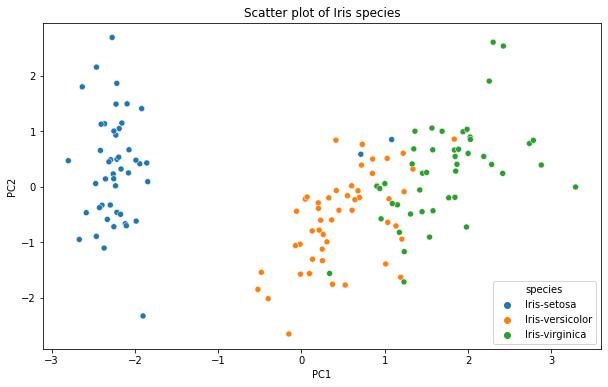

In [149]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=iris_pca_2['PC1'],y=iris_pca_2['PC2'],hue=iris['species'])
plt.title('Scatter plot of Iris species')
plt.show

**Observations**
- There seem to be clusters in the plot above, we can assume 3 since we already know we have 3 different types of species we are dealing with here

## K-Means 

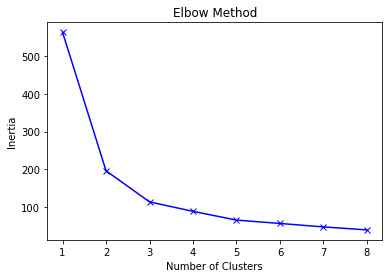

In [195]:
#first we need to determine the right number of clusters though we know 3 will do but lets just do it
se=[]

for i in range(1,9):
    km=KMeans(n_clusters=i,random_state=1).fit(iris_pca_2)
    se.append(km.inertia_)
    
plt.plot(range(1,9),se,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
    

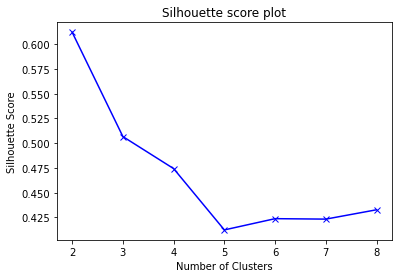

In [237]:
sc = []
for k in range(2,9):
    kmean = KMeans(n_clusters=k,random_state=1)
    kmean.fit(iris_pca_2)
    labels = kmean.predict(iris_pca_2)
    sc.append(silhouette_score(iris_pca_2,labels))
    
plt.plot(range(2,9),sc,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score plot')
plt.show()

- We can observe an elbow emerges at cluster 2 in the first figure, we can therefore choose that as our default number for clusters
- The silihouette score is high at cluster 2. This confirms that  is the riht number of clusters to go with.

In [176]:
#remember to always make a copy of the data as one will be used for fitting or predicting the outcomes and the other one for storing the labels
iris_pca_2_copy = iris_pca_2.copy()

In [189]:
model = KMeans(n_clusters=3,random_state=1)
model.fit(iris_pca_2)

KMeans(n_clusters=3, random_state=1)

In [239]:
iris_pca_2_copy['Kmeans_labels'] = model.predict(iris_pca_2)
ymeans = model.predict(iris_pca_2)
iris_pca_2_copy.head()

,PC1,PC2,Kmeans_labels
0,-2.291654,0.486576,1
1,-2.115428,-0.666015,1
2,-2.396070,-0.332493,1
3,-2.332435,-0.587708,1
4,-2.415395,0.653930,1


In [191]:
iris_pca_2_copy['Kmeans_labels'].value_counts()

0    52
1    48
2    47
Name: Kmeans_labels, dtype: int64

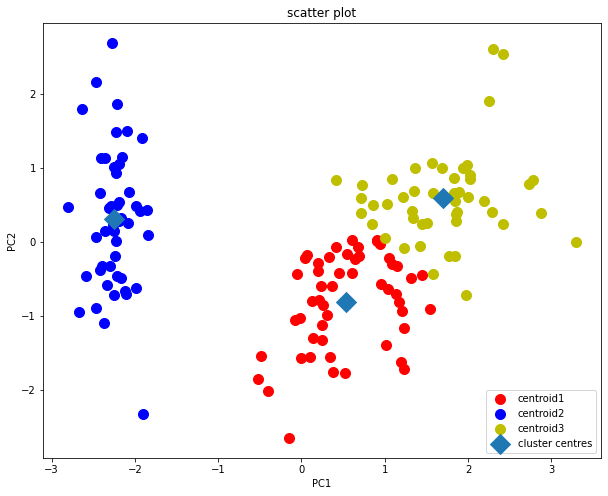

In [238]:
plt.figure(figsize=(10,8))

x = np.array(iris_pca_2_copy)

plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1],s=100,label='centroid1',c='r')
plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1],s=100,label='centroid2',c='b')
plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1],s=100,label='centroid3',c='y')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],label='cluster centres',s=200,marker = 'D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot')
plt.legend()
plt.show()

**Observations**
- From the above plots there are 3 clusters that are distinct ie Iris Setosa, Iris Versicolor and Iris Virginica